# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

612


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = '{}appid={}&units=imperial&q='.format(url, api_key)
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=14be05634fb4f17e44c07e7f11173b8d&units=imperial&q=


In [13]:
response = requests.get(query_url + "seattle").json()
pp.pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.61, 'lon': -122.33},
 'dt': 1604965187,
 'id': 5809844,
 'main': {'feels_like': 34.74,
          'humidity': 56,
          'pressure': 1022,
          'temp': 42.75,
          'temp_max': 45,
          'temp_min': 41},
 'name': 'Seattle',
 'sys': {'country': 'US',
         'id': 5692,
         'sunrise': 1604934390,
         'sunset': 1604968801,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 6.93}}


In [14]:
response['clouds']['all']

90

In [15]:
print('Begining Data Retrieval')
print('-----------------------')
record_counter = 0
city_list = []	
lat	= []
lon	= []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country	= []
date = []
# sets = len(cities)//50 + 1
 

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_list.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record_counter += 1
        print("Processing Record {}| {} ".format(record_counter, city))
    except:
        record_counter += 1
        print("Record {}. City not found. Skipping...".format(record_counter))
        pass

print('-----------------------')
print("Data Retrieval Complete")

Begining Data Retrieval
-----------------------
Processing Record 1| new norfolk 
Processing Record 2| teguise 
Processing Record 3| lata 
Processing Record 4| neuquen 
Processing Record 5| ushuaia 
Processing Record 6| sao joao da barra 
Processing Record 7| wamba 
Processing Record 8| valkeala 
Processing Record 9| rikitea 
Processing Record 10| ocampo 
Processing Record 11| mataura 
Record 12. City not found. Skipping...
Processing Record 13| nikolskoye 
Record 14. City not found. Skipping...
Processing Record 15| punta arenas 
Processing Record 16| codrington 
Processing Record 17| leningradskiy 
Processing Record 18| kaitangata 
Processing Record 19| padang 
Record 20. City not found. Skipping...
Processing Record 21| busselton 
Record 22. City not found. Skipping...
Processing Record 23| labuhan 
Processing Record 24| coihaique 
Processing Record 25| kibala 
Processing Record 26| boo 
Processing Record 27| bredasdorp 
Processing Record 28| voskresenskoye 
Processing Record 29| ir

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_data = pd.DataFrame({
    "City": city_list,
    "Lat": lat,
    "Lon": lon,
    "Temp Max": temp_max,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind Speed":wind_speed,
    "Country": country, 
    "Date": date
})
city_data.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,73.0,33,82,5.01,AU,1604965754
1,Teguise,29.06,-13.56,68.0,77,20,9.17,ES,1604965754
2,Lata,40.16,-8.33,59.0,91,2,1.72,PT,1604965754
3,Neuquén,-38.95,-68.06,73.4,46,75,10.29,AR,1604965754
4,Ushuaia,-54.80,-68.30,48.2,77,40,40.26,AR,1604965755


In [17]:
city_data.to_csv("Cities_Output_JK.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
city_data.loc[city_data['Humidity']>100]

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
#  Get the indices of cities that have humidity over 100%.


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Temp Max vs. Latitude


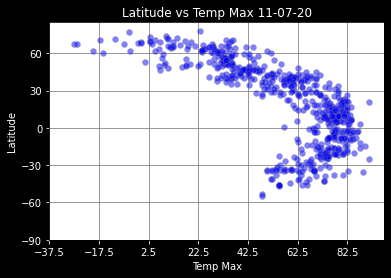

Humidity vs. Latitude


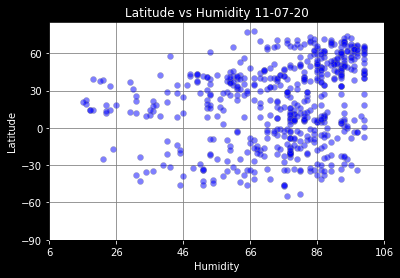

Cloudiness vs. Latitude


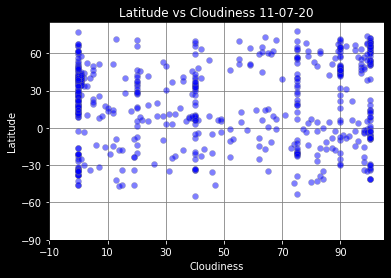

Wind Speed vs. Latitude


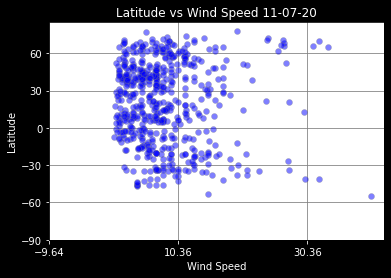

In [50]:
comparisons=["Temp Max", "Humidity",'Cloudiness', "Wind Speed"]

for compare in comparisons:
    lat_vs_temp = city_data.copy()
    lat_vs_temp = lat_vs_temp[["City", "Lat","Temp Max", "Humidity",'Cloudiness', "Wind Speed"]]
    lat_vs_temp_x = lat_vs_temp[compare]
    lat_vs_temp_y = lat_vs_temp["Lat"]

    plt.plot(lat_vs_temp_x, lat_vs_temp_y, 'o',markerfacecolor = 'blue', markeredgecolor='grey', markeredgewidth=.5, alpha=.5)
    plt.title("Latitude vs {} 11-07-20".format(compare), color='white')
    plt.xlabel("{}".format(compare), color='white')
    plt.ylabel("Latitude", color='white')
    plt.xticks(np.arange((min(lat_vs_temp[compare])-10), (max(lat_vs_temp[compare])+10), 20), color='white')
    plt.yticks(np.arange(-90,90, 30), color='white')
    ax = plt.axes()
    ax.set_facecolor('white')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.grid(b=True, which='major', axis='both', color='grey')

    print("{} vs. Latitude".format(compare))
    plt.savefig("{} vs. Latitude.png".format(compare))
    plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
hemis = ["Northern Hemisphere", "Southern Hemisphere"]
measures = ["Temp Max","Humidity", "Cloudiness","Wind Speed"]


Northern Hemisphere - Temp Max vs. Latitude
The r value is : -0.8647441174427836
--------------------------------------------
The Linear Equation for for this chart is y = -0.71x + 73.46
--------------------------------------------


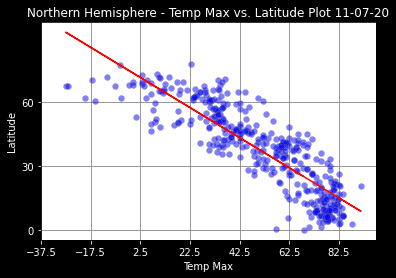

Southern Hemisphere - Temp Max vs. Latitude
The r value is : 0.6578398353188902
--------------------------------------------
The Linear Equation for for this chart is y = 0.89x + -85.12
--------------------------------------------


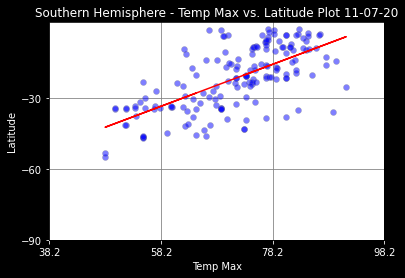

Northern Hemisphere - Humidity vs. Latitude
The r value is : 0.33841128913236096
--------------------------------------------
The Linear Equation for for this chart is y = 0.34x + 11.68
--------------------------------------------


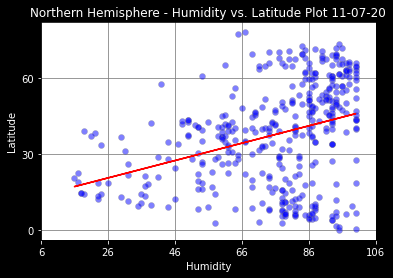

Southern Hemisphere - Humidity vs. Latitude
The r value is : 0.2543139826892738
--------------------------------------------
The Linear Equation for for this chart is y = 0.21x + -36.58
--------------------------------------------


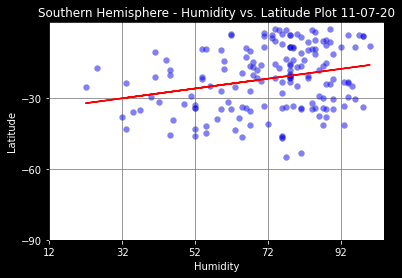

Northern Hemisphere - Cloudiness vs. Latitude
The r value is : 0.28195754027825104
--------------------------------------------
The Linear Equation for for this chart is y = 0.14x + 31.25
--------------------------------------------


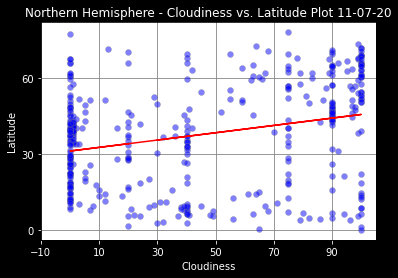

Southern Hemisphere - Cloudiness vs. Latitude
The r value is : 0.3225110173276562
--------------------------------------------
The Linear Equation for for this chart is y = 0.12x + -27.74
--------------------------------------------


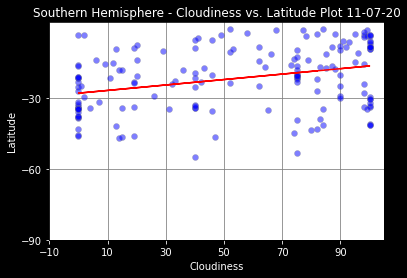

Northern Hemisphere - Wind Speed vs. Latitude
The r value is : 0.19130662134012946
--------------------------------------------
The Linear Equation for for this chart is y = 0.66x + 32.63
--------------------------------------------


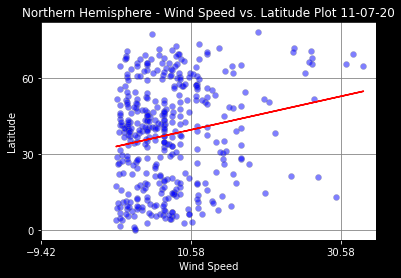

Southern Hemisphere - Wind Speed vs. Latitude
The r value is : -0.3823503948599775
--------------------------------------------
The Linear Equation for for this chart is y = -0.81x + -14.05
--------------------------------------------


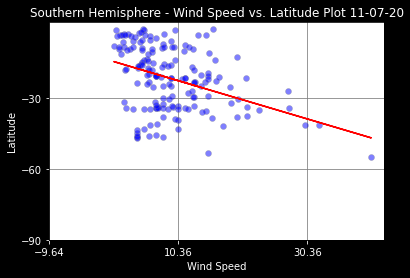

In [51]:
for measure in measures:
    for hemi in hemis:
        lat_regress = city_data.copy()
        if hemi == "Northern Hemisphere":
            lat_regress = lat_regress.loc[lat_regress['Lat']>0]
        else:
            lat_regress = lat_regress.loc[lat_regress['Lat']<0]
        lat_regress = lat_regress[["City", "Lat","Temp Max","Humidity", "Cloudiness","Wind Speed"]]
        lat_regress_x = lat_regress[measure]
        lat_regress_y = lat_regress['Lat']

        x_values = lat_regress[measure]
        y_values = lat_regress['Lat']
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


        plt.plot(lat_regress_x, lat_regress_y, 'o',markerfacecolor = 'blue', markeredgecolor='grey', markeredgewidth=.5, alpha=.5)
        plt.title("{} - {} vs. Latitude Plot 11-07-20".format(hemi, measure), color='white')
        plt.plot(x_values,regress_values,"r-")
        if hemi == "Northern Hemisphere":
            plt.yticks(np.arange(0,90,30), color='white')
        else:
            plt.yticks(np.arange(-90,0,30), color='white')
        
        plt.xlabel(measure, color='white')
        plt.ylabel("Latitude", color='white')
        plt.xticks(np.arange((min(lat_regress[measure])-10), (max(lat_regress[measure])+10), 20), color='white')
        
        ax = plt.axes()
            
        ax.set_facecolor('white')
        ax.spines['bottom'].set_color('black')
        ax.spines['top'].set_color('black') 
        ax.spines['right'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.grid(b=True, which='major', axis='both', color='grey')
        
        print("{} - {} vs. Latitude".format(hemi, measure))
        print("The r value is : {}".format(rvalue))
        print('--------------------------------------------')
        print('The Linear Equation for for this chart is {}'.format(line_eq))
        print('--------------------------------------------')
        plt.savefig("{} - {} vs. Latitude.png".format(hemi, measure))
        plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression